In [ ]:
import pandas as pd

morgan_1000_df = pd.read_csv('Morgan_1000_all.csv')
morgan_250_df = pd.read_csv('Morgan_250_all.csv')
samfid_1000 = morgan_1000_df['SAMFid']
samfid_250 = morgan_250_df['SAMFid']

matching_indices = morgan_1000_df[morgan_1000_df['SAMFid'].isin(samfid_250)].index.tolist()
print("Matching indices in Morgan_1000_all:", matching_indices)

Matching indices in Morgan_1000_all: [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 23, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 89, 90, 93, 94, 97, 100, 101, 103, 104, 110, 131, 132, 134, 135, 136, 137, 140, 142, 143, 148, 159, 177, 180, 181, 193, 218, 226, 227, 238, 253, 259, 265, 270, 271, 272, 290, 309, 311, 329, 340, 420, 428, 450, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 526, 527, 529, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 545, 546, 547, 549, 561, 602, 606, 611, 624, 703, 735, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 863, 867, 869, 873, 878, 879, 880, 883, 888, 889, 893, 896, 905, 913, 914, 915, 916, 917, 918, 919, 925, 926, 927, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 944, 945, 946, 947, 948, 

In [ ]:
from rdkit import Chem
import pandas as pd
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#################################################################
#################################################################
TCfile_path = './Morgan_1000_all.csv'
Featurefile_path = './RD_1000_all.csv'
TCdata = pd.read_csv(TCfile_path, index_col='SAMFid')
Featuredata = pd.read_csv(Featurefile_path, index_col='SAMFid')
data = TCdata.merge(Featuredata, left_index=True, right_index=True, how='inner')

X = data.iloc[:, 0:]
#################################################################
#################################################################
TCfile_path = './Morgan_250_all.csv'
Featurefile_path = './RD_250_all.csv'
TCdata = pd.read_csv(TCfile_path, index_col='SAMFid')
Featuredata = pd.read_csv(Featurefile_path, index_col='SAMFid')
data = TCdata.merge(Featuredata, left_index=True, right_index=True, how='inner')

X1 = data.iloc[:, 0:]
#################################################################
#################################################################

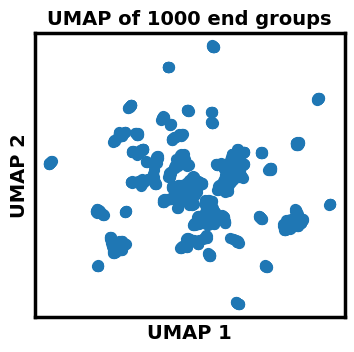

In [ ]:
import umap
reducer = umap.UMAP(n_neighbors=7, min_dist=0.5, metric='euclidean', random_state=2)
embedding = reducer.fit_transform(X)

plt.figure(figsize=(4, 3.7))
scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
#     c=df['kinds'],
    cmap='Spectral',
    s=50
)
plt.title('UMAP of 1000 end groups', fontsize=14, fontweight='bold')
plt.xlabel('UMAP 1', fontsize=14, fontweight='bold')
plt.ylabel('UMAP 2', fontsize=14, fontweight='bold')

plt.gca().spines['top'].set_linewidth(2.5)
plt.gca().spines['right'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.gca().spines['left'].set_linewidth(2.5)

plt.xticks(ticks=[], fontsize=12, fontweight='bold')
plt.yticks(ticks=[], fontsize=12, fontweight='bold')

plt.show()

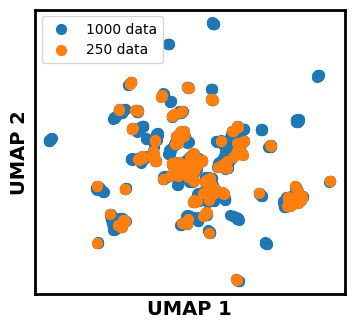

In [ ]:
plt.figure(figsize=(4, 3.7))
scatter = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
#     c=df['kinds'],
    cmap='Spectral',
    label='1000 data',
    s=50,
)

scatter = plt.scatter(
    embedding[:, 0][matching_indices],
    embedding[:, 1][matching_indices],
#     c=df['kinds'],
    cmap='Spectral',
    label='250 data',
    s=50
)

plt.xlabel('UMAP 1', fontsize=14, fontweight='bold')
plt.ylabel('UMAP 2', fontsize=14, fontweight='bold')

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

plt.xticks(ticks=[], fontsize=12, fontweight='bold')
plt.yticks(ticks=[], fontsize=12, fontweight='bold')
plt.legend(loc='upper left')

plt.savefig('umap.jpg', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()